In [1]:
!pip install matplotlib

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


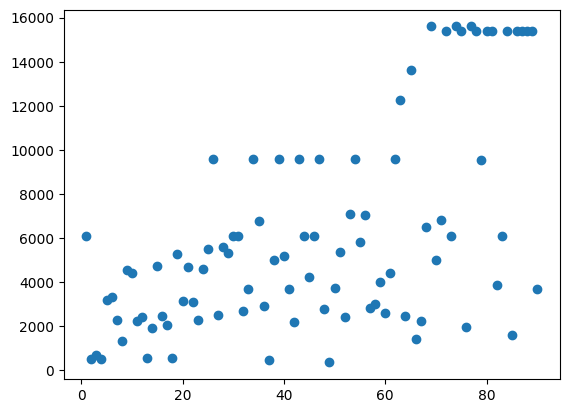

In [5]:
#ax = plt.scatter(x=df)
plt.scatter(x=df['FlightNumber'], y=df['PayloadMass'])
plt.show()

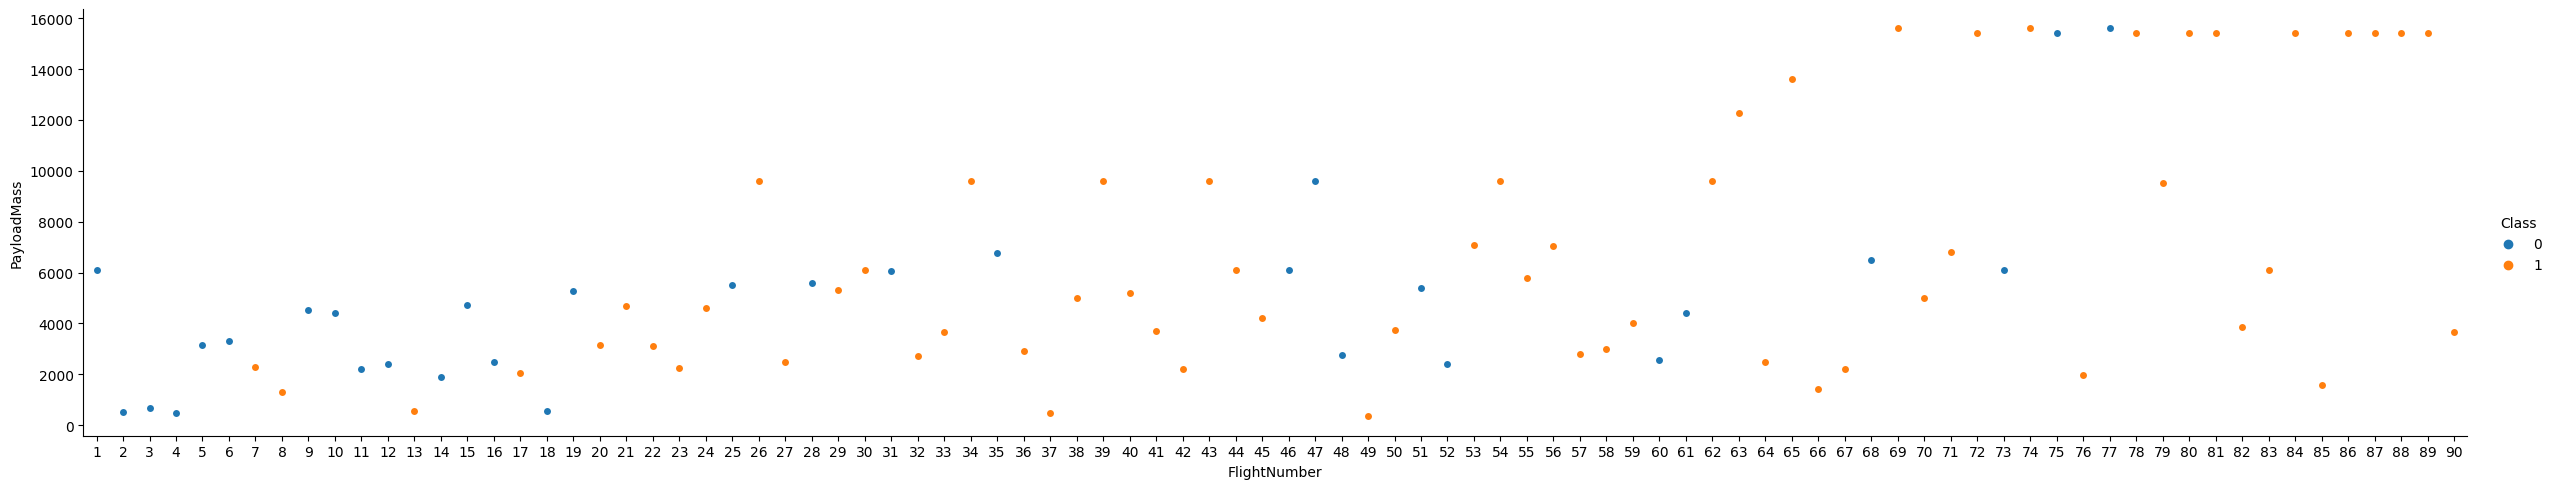

In [6]:
sns.catplot(x='FlightNumber', y='PayloadMass', hue='Class', data=df, aspect=5)
plt.show()

In [7]:
print(sum(df[df['LaunchSite']=='CCAFS SLC 40']['Class']==1)/sum(df['LaunchSite']=='CCAFS SLC 40'))
#print(sum(df[df['LaunchSite']=='KSC LC-39A']['Class']==1)/sum(df['LaunchSite']=='KSC LC-39A'))
print(sum(df[df['LaunchSite']=='VAFB SLC 4E']['Class']==1)/sum(df['LaunchSite']=='VAFB SLC 4E'))
#sum(df['LaunchSite']=='CCAFS SLC 40')

0.6
0.7692307692307693


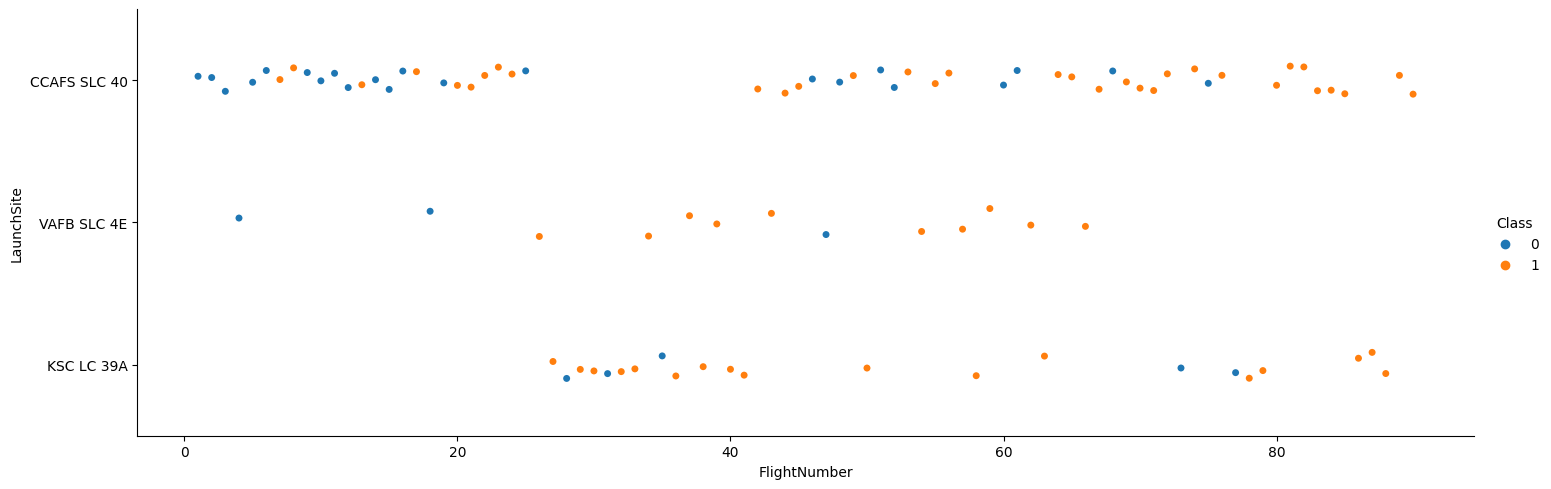

In [8]:
sns.catplot(x='FlightNumber', y='LaunchSite', data=df, hue='Class', aspect=3)
plt.show()

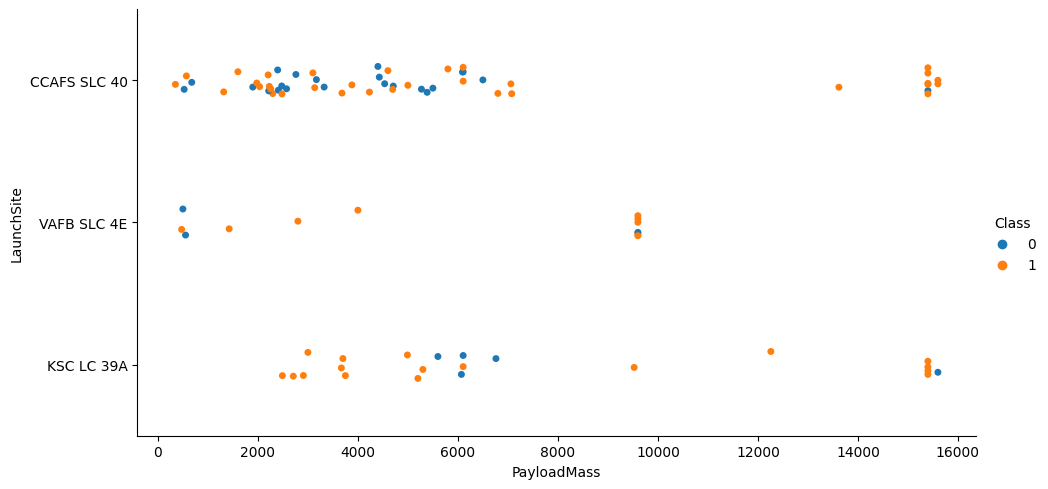

In [9]:
sns.catplot(x='PayloadMass', y='LaunchSite', data=df, hue='Class', aspect=2)
plt.show()

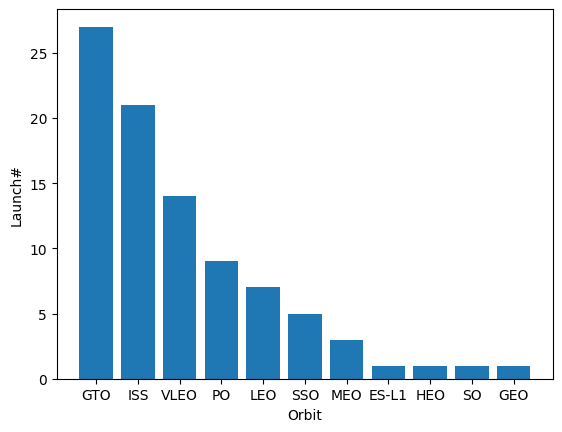

In [10]:
xOrbit = df['Orbit'].value_counts().index.to_list()
yCount = list(df['Orbit'].value_counts().values)
plt.bar(xOrbit, yCount)
plt.xlabel('Orbit')
plt.ylabel('Launch#')
plt.show()

{'GTO': 0.5185185185185185, 'ISS': 0.6190476190476191, 'VLEO': 0.8571428571428571, 'PO': 0.6666666666666666, 'LEO': 0.7142857142857143, 'SSO': 1.0, 'MEO': 0.6666666666666666, 'ES-L1': 1.0, 'HEO': 1.0, 'SO': 0.0, 'GEO': 1.0}


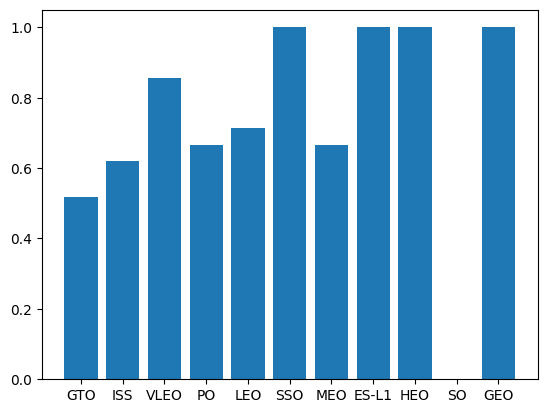

In [11]:
successDict={}
dfSuccess = df[df['Class']==1]
for orbit in df['Orbit'].value_counts().index.to_list():
    #print(sum(df['Orbit']==orbit))#/sum(df[df['Orbit']==orbit]['Class']==1))
    #print(sum(df[df['Orbit']==orbit]['Class']==1))
    successDict[orbit]=(sum(df[df['Orbit']==orbit]['Class']==1)/sum(df['Orbit']==orbit))
print(successDict)
xOrbit = list(successDict.keys())
yRate = list(successDict.values())
plt.bar(xOrbit, yRate)
plt.show()

In [12]:
df['Orbit']

0      LEO
1      LEO
2      ISS
3       PO
4      GTO
      ... 
85    VLEO
86    VLEO
87    VLEO
88    VLEO
89     MEO
Name: Orbit, Length: 90, dtype: object

C:\Users\vanol\AppData\Local\Temp\ipykernel_23692\2173698330.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df.groupby('Orbit').mean()['Class'].index.to_list(), np.asarray(df.groupby('Orbit').mean()['Class']))
C:\Users\vanol\AppData\Local\Temp\ipykernel_23692\2173698330.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(df.groupby('Orbit').mean()['Class'].index.to_list(), np.asarray(df.groupby('Orbit').mean()['Class']))


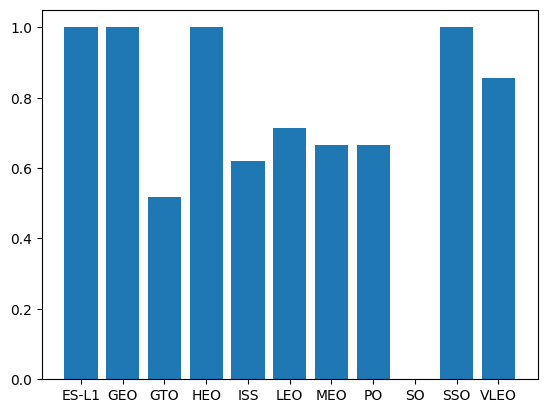

In [13]:
plt.bar(df.groupby('Orbit').mean()['Class'].index.to_list(), np.asarray(df.groupby('Orbit').mean()['Class']))
plt.show()

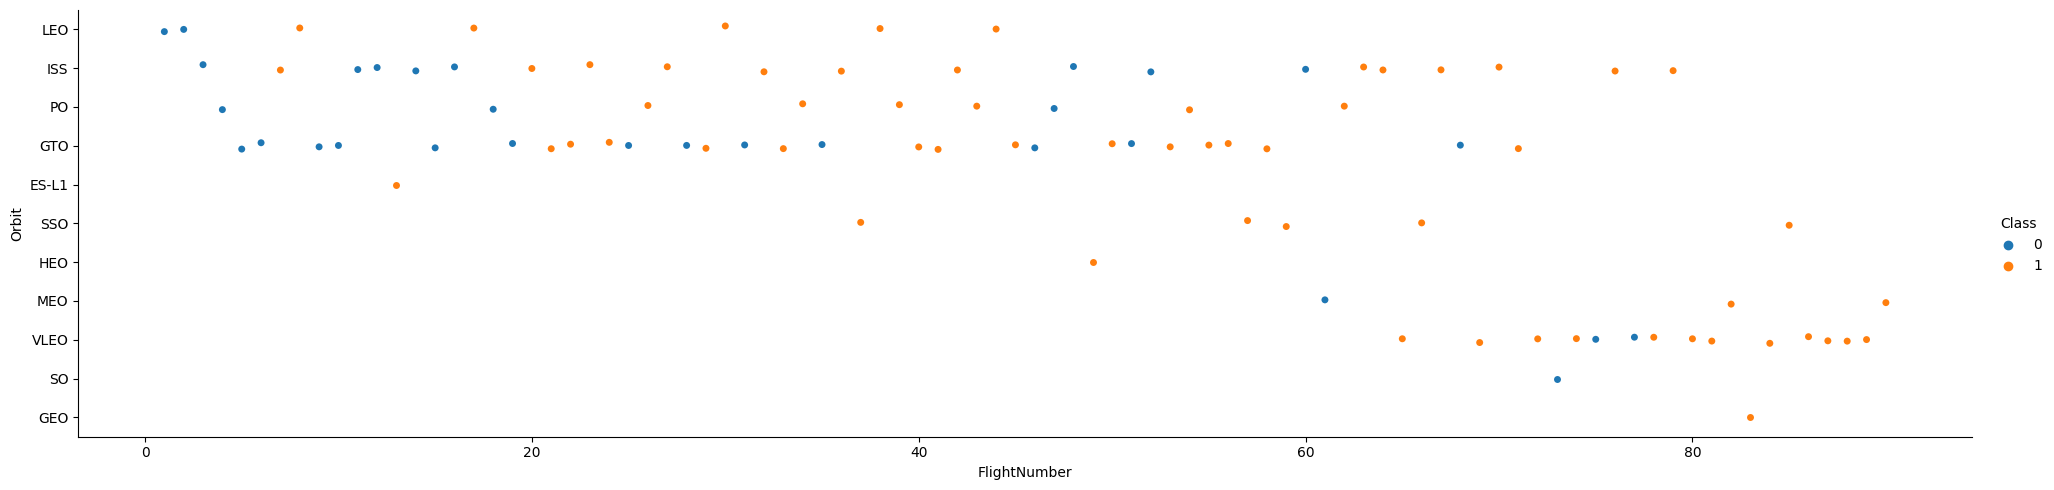

In [14]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='FlightNumber', y='Orbit', data=df, hue='Class', aspect=4)
plt.show()

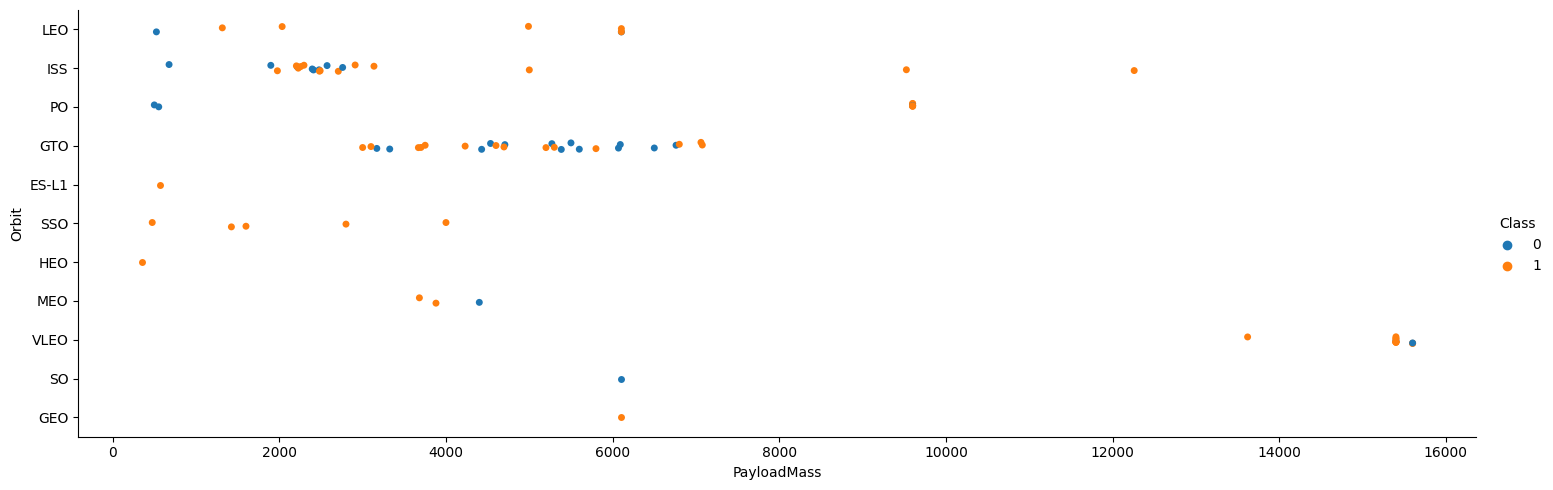

In [15]:
sns.catplot(x='PayloadMass', y='Orbit', data=df, hue='Class', aspect=3)
plt.show()

C:\Users\vanol\AppData\Local\Temp\ipykernel_23692\2985533160.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfSuccess = df.groupby('Year').mean()


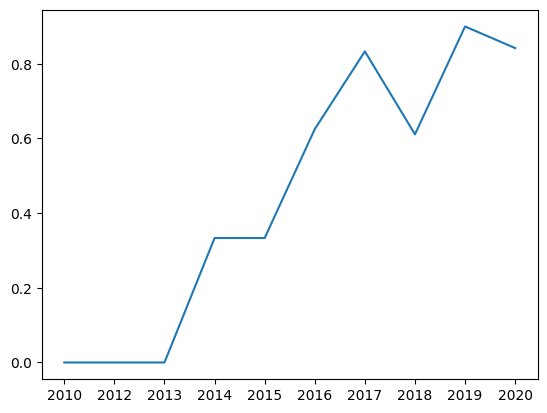

In [16]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year(df['Date'])
df['Year']=year
dfSuccess = df.groupby('Year').mean()

plt.plot(dfSuccess.index.to_list(), dfSuccess['Class'])
plt.show()

In [18]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [23]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


  DEPRECATION: sklearn is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [56]:
features_one_hot = pd.get_dummies(features[['Orbit', 'LaunchSite', 'LandingPad', 'Serial']])
features_one_hot.head(5)

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
features_one_hot = features_one_hot.astype('float64')

In [58]:
features_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Orbit_ES-L1                          90 non-null     float64
 1   Orbit_GEO                            90 non-null     float64
 2   Orbit_GTO                            90 non-null     float64
 3   Orbit_HEO                            90 non-null     float64
 4   Orbit_ISS                            90 non-null     float64
 5   Orbit_LEO                            90 non-null     float64
 6   Orbit_MEO                            90 non-null     float64
 7   Orbit_PO                             90 non-null     float64
 8   Orbit_SO                             90 non-null     float64
 9   Orbit_SSO                            90 non-null     float64
 10  Orbit_VLEO                           90 non-null     float64
 11  LaunchSite_CCAFS SLC 40           

In [60]:
len(features.columns.to_list()) + len(features_one_hot.columns.to_list())

84

In [51]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'Year'],
      dtype='object')

In [55]:
df['Serial'].value_counts()

B1049    6
B1051    5
B1059    4
B1056    4
B1048    4
B1046    4
B1060    3
B1058    3
B1047    3
B1031    2
B1036    2
B1021    2
B1039    2
B1035    2
B1041    2
B1029    2
B1040    2
B1045    2
B1032    2
B1042    1
B1043    1
B1038    1
B1044    1
B1037    1
B1050    1
B1054    1
B1034    1
B0003    1
B1030    1
B1013    1
B0007    1
B1003    1
B1004    1
B1005    1
B1006    1
B1007    1
B1008    1
B1011    1
B1010    1
B1012    1
B1015    1
B0005    1
B1016    1
B1018    1
B1019    1
B1017    1
B1020    1
B1022    1
B1023    1
B1025    1
B1026    1
B1028    1
B1062    1
Name: Serial, dtype: int64